# Titanic Classification Project


---

# Problem Definition

- Dataset

    - [Titanic Dataset from Kaggle](https://www.kaggle.com/competitions/titanic/data?select=train.csv)


- Objective
    - The goal of this project is to predict whether a passenger survived the Titanic disaster based on the above features.

<br>

- Following classification algorithms will be used on the dataset

    1. [Logistic Regression Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression)
    2. [Support Vector Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)
    3. [K-Nearest Neighbors Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier)
    4. [Gaussian Naive Bayes Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB)
    5. [Decision Tree Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)
    6. [Random Forest Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
    7. [Gradient Boosting Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html#sklearn.ensemble.GradientBoostingClassifier)
    8. [Adaboost](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html)
    10. [Neural Network](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)


<br>


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.preprocessing import OneHotEncoder

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [2]:
train_df = pd.read_csv('/content/train.csv')
test_df = pd.read_csv('/content/test.csv')

# train_df_copy = train_df.copy()
# test_df_copy = test_df.copy()

In [3]:
train_df.head()
# train_df.shape

# test_df.head()
# test_df.shape

# train_df_copy.head()
# train_df_copy.shape

# test_df_copy.head()
# test_df_copy.shape

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Data Cleaning and Preprocessing

- Handle missing values
- Convert categorical features to numerical values
- Scale numerical features

<br>


In [4]:
# Summary of features in train data
train_df.describe(include='all')


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [5]:
# Summary of features in test data
test_df.describe(include='all')


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,418.000000,418.000000,418,418,332.000000,418.000000,418.000000,418,417.000000,91,418
unique,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3
top,NaN,NaN,"Kelly, Mr. James",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S
freq,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270
mean,1100.500000,2.265550,NaN,NaN,30.272590,0.447368,0.392344,NaN,35.627188,NaN,NaN
std,120.810458,0.841838,NaN,NaN,14.181209,0.896760,0.981429,NaN,55.907576,NaN,NaN
min,892.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,996.250000,1.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,1100.500000,3.000000,NaN,NaN,27.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1204.750000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.500000,NaN,NaN


In [6]:
# Missing value count in train data
train_df.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
# Missing value count in test data
test_df.isnull().sum()


PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [8]:
# Fill missing 'Age' values with median age
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
test_df['Age'].fillna(test_df['Age'].median(), inplace=True)


In [9]:
# train_df['Embarked'].mode()

# Fill missing 'Embarked' values in train data with the mode
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)


In [10]:
# Fill missing 'Fare' values in test data with the median
test_df['Fare'].fillna(test_df['Fare'].median(), inplace=True)


In [11]:
# Drop 'Cabin' due to many missing values
train_df.drop(columns=['Cabin'], inplace=True)
test_df.drop(columns=['Cabin'], inplace=True)


In [12]:
train_df.isnull().sum()
# test_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [13]:
# Drop 'Name', 'Ticket', and 'PassengerId' since not useful for prediction
train_df.drop(columns=['Name', 'Ticket', 'PassengerId'], inplace=True)
test_df.drop(columns=['Name', 'Ticket', 'PassengerId'], inplace=True)


In [14]:
train_df.dtypes
# test_df.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [15]:
train_df['Sex'].unique()
# test_df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [16]:
train_df['Embarked'].unique()
# test_df['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [17]:
# One Hot Encoding on categorical columns in train data
features = train_df[['Sex', 'Embarked']]

encoder = OneHotEncoder(sparse=False, drop='first')
features_encoded = encoder.fit_transform(features)

feature_names_encoded = encoder.get_feature_names_out()
encoded_df = pd.DataFrame(features_encoded, columns=feature_names_encoded)

train_df = pd.concat([train_df.drop(columns=['Sex', 'Embarked']), encoded_df], axis=1)
train_df.head()


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1.0,0.0,1.0
1,1,1,38.0,1,0,71.2833,0.0,0.0,0.0
2,1,3,26.0,0,0,7.9250,0.0,0.0,1.0
3,1,1,35.0,1,0,53.1000,0.0,0.0,1.0
4,0,3,35.0,0,0,8.0500,1.0,0.0,1.0


In [18]:
# One Hot Encoding on categorical columns in test data
features = test_df[['Sex', 'Embarked']]

encoder = OneHotEncoder(sparse=False, drop='first')
features_encoded = encoder.fit_transform(features)

feature_names_encoded = encoder.get_feature_names_out()
encoded_df = pd.DataFrame(features_encoded, columns=feature_names_encoded)

test_df = pd.concat([test_df.drop(columns=['Sex', 'Embarked']), encoded_df], axis=1)
test_df.head()


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,34.5,0,0,7.8292,1.0,1.0,0.0
1,3,47.0,1,0,7.0000,0.0,0.0,1.0
2,2,62.0,0,0,9.6875,1.0,1.0,0.0
3,3,27.0,0,0,8.6625,1.0,0.0,1.0
4,3,22.0,1,1,12.2875,0.0,0.0,1.0


In [19]:
train_df.head()
# test_df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1.0,0.0,1.0
1,1,1,38.0,1,0,71.2833,0.0,0.0,0.0
2,1,3,26.0,0,0,7.9250,0.0,0.0,1.0
3,1,1,35.0,1,0,53.1000,0.0,0.0,1.0
4,0,3,35.0,0,0,8.0500,1.0,0.0,1.0


---

# Exploratory Data Analysis (EDA)

<br>


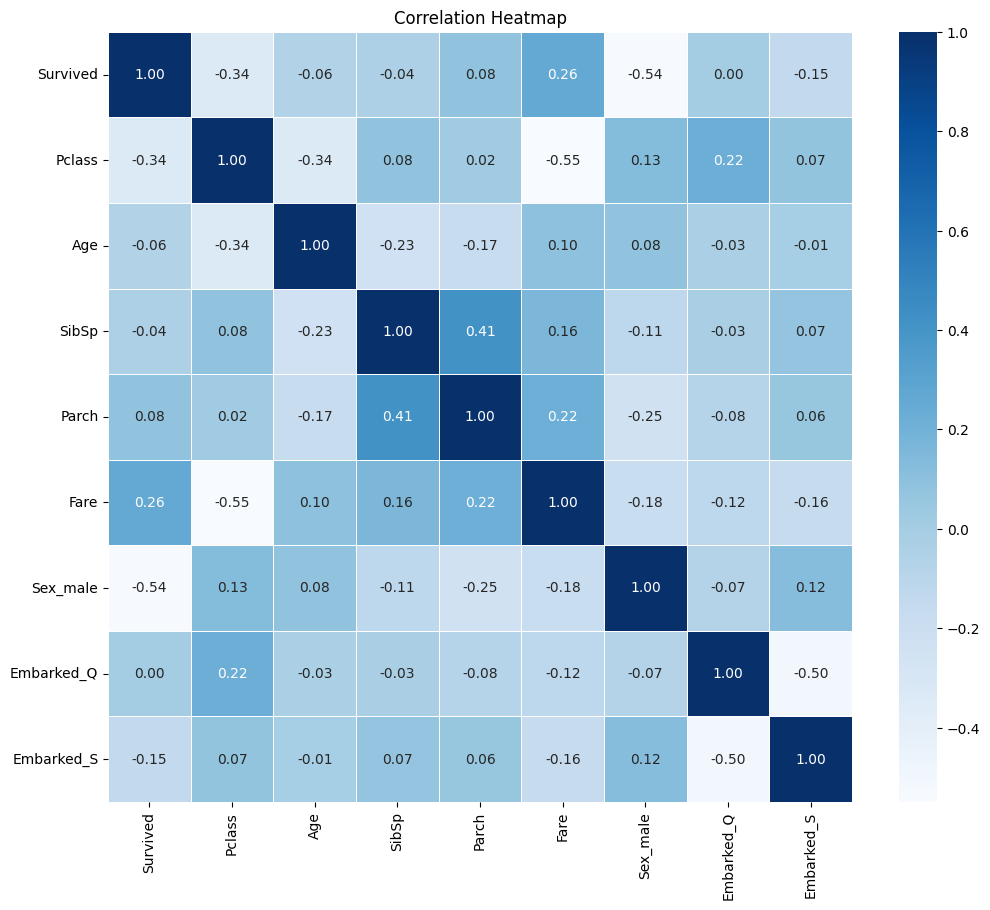

In [20]:
# Correlation Matrix for train data
plt.figure(figsize=(12, 10))
sns.heatmap(train_df.corr(), annot=True, cmap='Blues', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


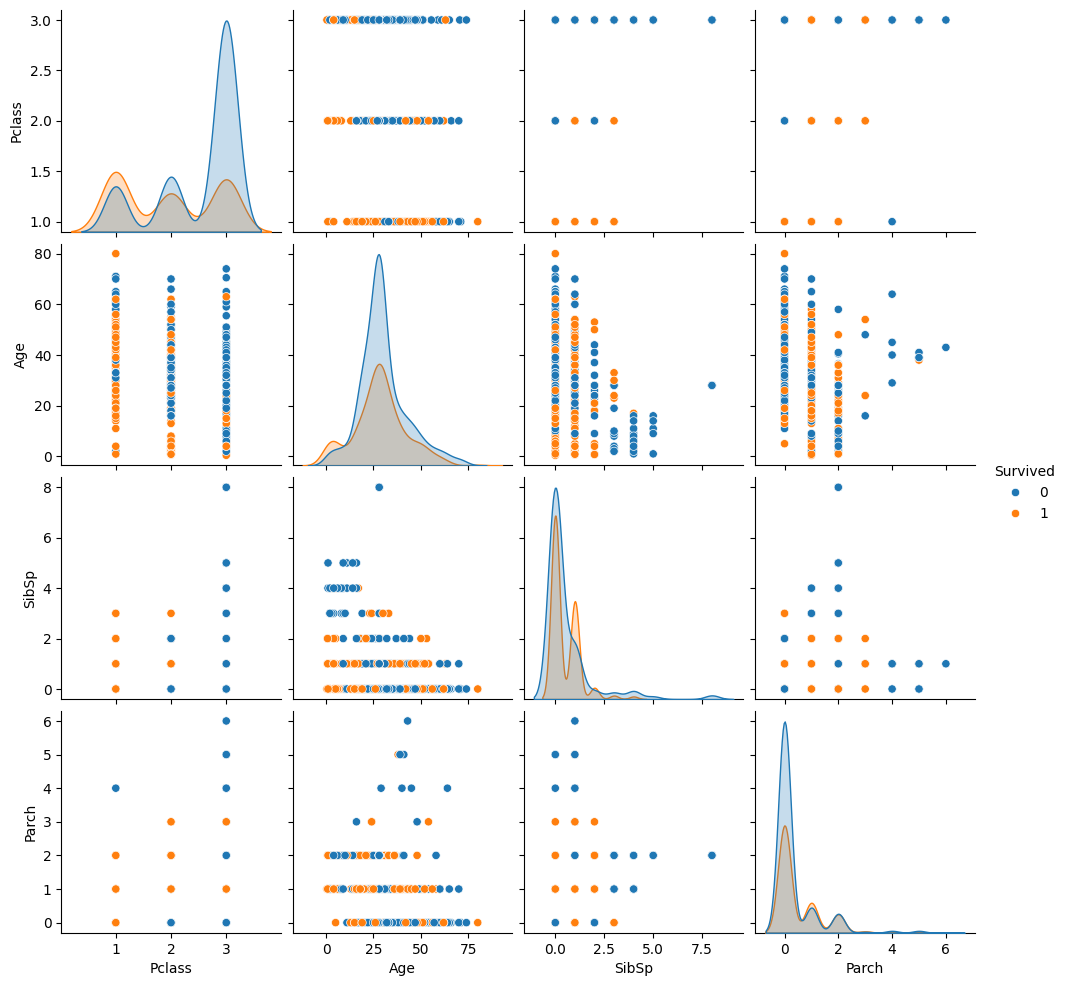

In [21]:
# Pair plot for train data
pairplot_cols = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch']
pairplot_data = train_df[pairplot_cols]
sns.pairplot(pairplot_data, hue='Survived')
plt.show()


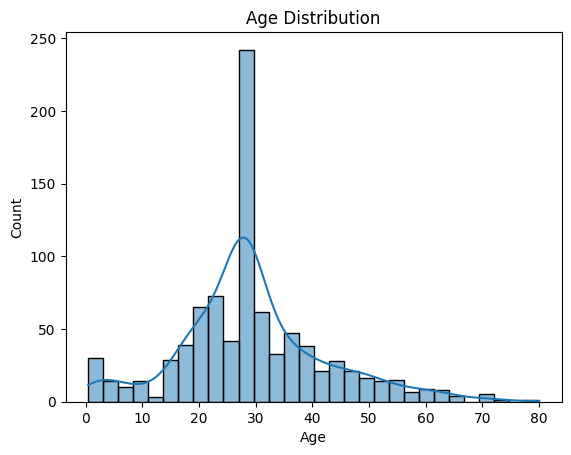

In [22]:
# Plot age distribution
sns.histplot(train_df['Age'], kde=True)
plt.title('Age Distribution')
plt.show()


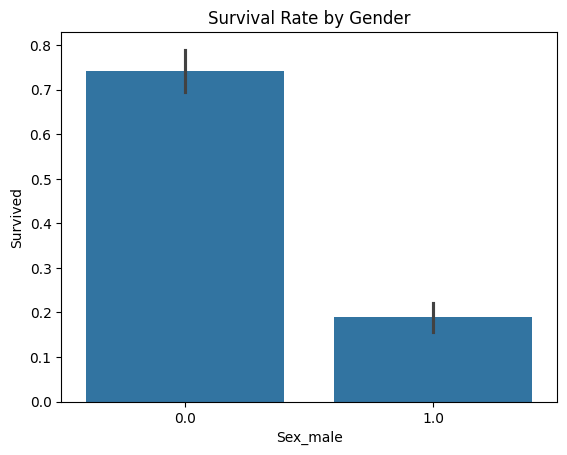

In [23]:
# Plot survival rate by gender
sns.barplot(x='Sex_male', y='Survived', data=train_df)
plt.title('Survival Rate by Gender')
plt.show()


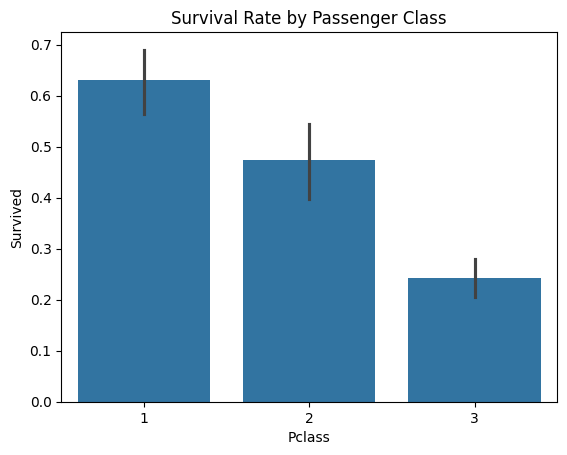

In [24]:
# Plot survival rate by passenger class
sns.barplot(x='Pclass', y='Survived', data=train_df)
plt.title('Survival Rate by Passenger Class')
plt.show()


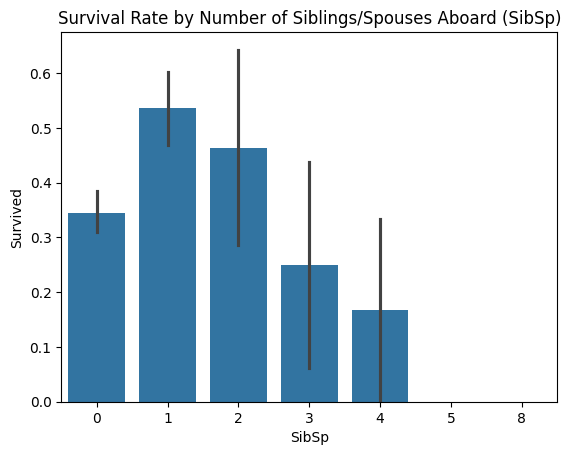

In [25]:
# Plot survival rate by number of siblings/spouses aboard (SibSp)
sns.barplot(x='SibSp', y='Survived', data=train_df)
plt.title('Survival Rate by Number of Siblings/Spouses Aboard (SibSp)')
plt.show()


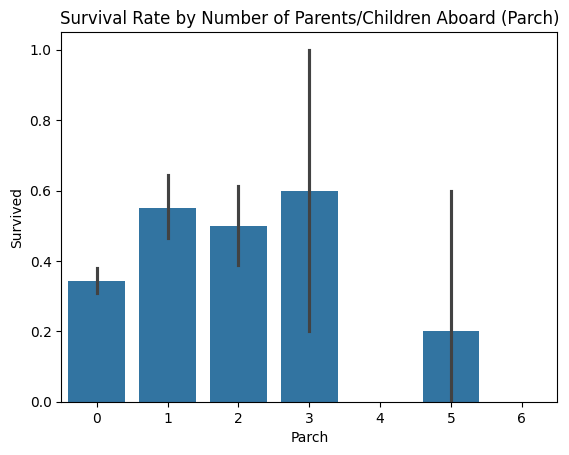

In [26]:
# Plot survival rate by number of parents/children aboard (Parch)
sns.barplot(x='Parch', y='Survived', data=train_df)
plt.title('Survival Rate by Number of Parents/Children Aboard (Parch)')
plt.show()


# Feature Engineering

<br>


In [27]:
# Create new feature for family members count
train_df['Family'] = train_df['SibSp'] + train_df['Parch']
test_df['Family'] = test_df['SibSp'] + test_df['Parch']


In [28]:
# Drop 'SibSp' and 'Parch'
train_df.drop(columns=['SibSp', 'Parch'], inplace=True)
test_df.drop(columns=['SibSp', 'Parch'], inplace=True)


In [29]:
train_df.head()
# test_df.head()

,Survived,Pclass,Age,Fare,Sex_male,Embarked_Q,Embarked_S,Family
0,0,3,22.0,7.2500,1.0,0.0,1.0,1
1,1,1,38.0,71.2833,0.0,0.0,0.0,1
2,1,3,26.0,7.9250,0.0,0.0,1.0,0
3,1,1,35.0,53.1000,0.0,0.0,1.0,1
4,0,3,35.0,8.0500,1.0,0.0,1.0,0


# Model Training

<br>


In [30]:
# Split the data into training and validation sets
X = train_df.drop(columns=['Survived'])
y = train_df['Survived']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [31]:
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=6),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(max_depth=5, min_samples_split=20, min_samples_leaf=5),
    'Random Forest': RandomForestClassifier(n_estimators=100, max_depth=7, min_samples_split=10, min_samples_leaf=4, random_state=1),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, learning_rate=0.5, max_depth=3, min_samples_split=20, min_samples_leaf=5),
    'AdaBoost': AdaBoostClassifier(n_estimators=100, learning_rate=0.5),
    'Neural Network': MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, activation='relu', solver='adam', alpha=0.0001)
}


In [32]:
# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)

    accuracy = accuracy_score(y_val, y_pred)

    print(f"{name} - Accuracy: {accuracy:.4f}")
    print(confusion_matrix(y_val, y_pred))
    print(classification_report(y_val, y_pred))


Logistic Regression - Accuracy: 0.8045
[[90 15]
 [20 54]]
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       105
           1       0.78      0.73      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179

Support Vector Machine - Accuracy: 0.6592
[[99  6]
 [55 19]]
              precision    recall  f1-score   support

           0       0.64      0.94      0.76       105
           1       0.76      0.26      0.38        74

    accuracy                           0.66       179
   macro avg       0.70      0.60      0.57       179
weighted avg       0.69      0.66      0.61       179

K-Nearest Neighbors - Accuracy: 0.7263
[[96  9]
 [40 34]]
              precision    recall  f1-score   support

           0       0.71      0.91      0.80       105
           1       0.79      0.46      0.58        74

    a

# Model Evaluation
-  Choose the best model and evaluate it on the test set

<br>


In [33]:
# Predict on the test set
best_model = models['Logistic Regression']

test_predictions = best_model.predict(test_df)


In [34]:
# Save the submission file
submission = pd.read_csv('test.csv')
submission['Survived'] = test_predictions
submission = submission[['PassengerId', 'Survived']]

submission.to_csv('submission.csv', index=False)
